# Sales Analysis

---

## Importing Required Libraries and Resources

In [1]:
import pandas as pd
import os

---

## Cleaning and arranging data before analysis

#### Task1: Merge data of all months in a single CSV file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

all_months_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

#### Read in Updated DataFrame

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

### Clean Up the Data!

#### <i>Drop rows with NAN</i>

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

#### <i>Find 'or' and delete it</i>

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with additional columns

#### Task2: Add a month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')

all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

#### Task 3: Add a Sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

#### Task 4: Add a city column

In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  
0        Dallas (TX)  
2        Boston (MA)  
3   Los Angeles (CA)  
4   Los Angeles (CA)  
5   Los Angeles (CA)

---

## Analysing data according to business requirements

#### Question1. What was the best month for sales? How much was earned that month?

In [10]:
results = all_data.groupby('Month').sum()

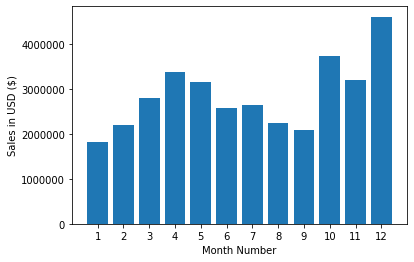

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### December was the month with highest sales
##### Reasons contributing to highest number of sales in December
<ul><li>A number of US holidays is in the month of December</li>
    <li>People buying gifts for christmas and new year</li>
    <li>There's high discounts during festivals leading to increased purchase</li></ul>

#### Question2. Which city had the highest number of sales?

In [12]:
results_city = all_data.groupby('City').sum()
results_city

Quantity Ordered    Price Each   Month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06

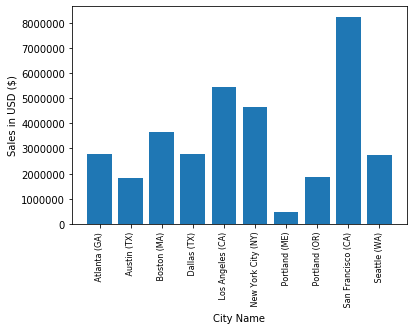

In [16]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results_city['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### San Francisco was the state with highest number of sales
<ul><li>Requirements of electronics goods is higher in the San Francisco</li>
    <li>Silicon valley is situated in San Francisco which is home to many start-up and global technology companies. It’s also the site of technology-focused institutions. Hence it contributes to highest sales in the state.</li>
</ul>

#### Question3. What time should we display advertisements to maximize likelihood of customer's buying the product?

In [19]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [20]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  Hour  Minute  
0        Dallas (TX)     8      46  
2        Boston (MA)    22      30  
3   Los Angeles (CA)    14      38  
4   Los Angeles (CA)    14      38  
5   Los Angeles (CA)     9      27

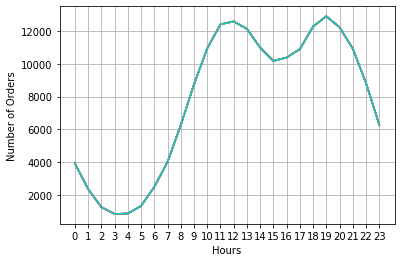

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#My recommendation is between 11am (11) and 7pm (19)

### On average the sales peaked between 10am-12pm and 6pm-8pm
##### To get high ROI, the advertisements should be displayed in the time period mentioned above

#### Question4. What products are most often sold together?

In [23]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Order ID                                            Grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable

In [26]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
        print (key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### iPhone and Lightning Charging Cable are most often bought together
##### iPhone and Lightining Charging Cable should be advertised together as the likelihood of people buying these items together is the highest

#### Question5. What product sold the most and why?

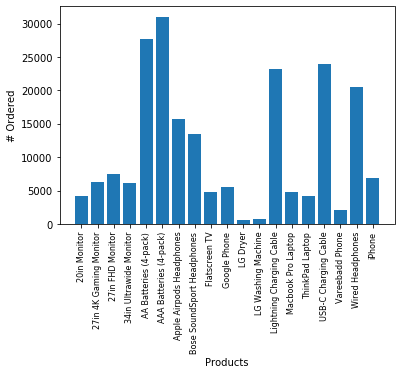

In [29]:
products_group = all_data.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered']

products = [product for product, df in products_group]

plt.bar(products, quantity_ordered)
plt.ylabel('# Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

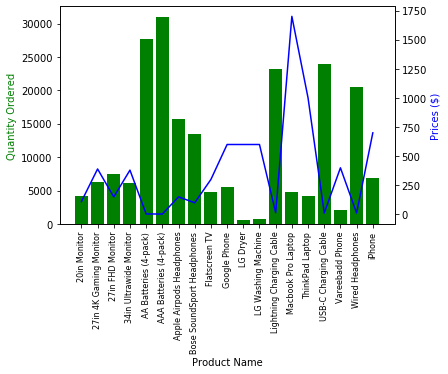

In [33]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

### The general rule is that the lower priced items are bought in large quantities and higher prices items are bought in less quantities
##### This holds true for most products in our dataset
<ul><li>The AA and AAA batteries are bought in large quantities given the lower price of the item</li>
    <li>Charging cables are also bought in high quantities i.e Lightining charging cable and USB-C charging cable</li>
    <li>The cost of LG dryers and washing machine is high and hence they are ordered in small quantities</li>
</ul>
<p>Reason: Items like charging cables and batteries have a short life as there's a lot of wear and tear and they are depleted faster which demands these items to be replaced over short periods of time. Whereas itmes like washing machine and dryers are expensive and hence  ordered in lesser quantities and can be used by multiple people at a time </p>
<p> Let's look at some inconsistencies</p>
<ul><li>MacBook and Thinkpad laptops have a higher price yet they have a high number of sales</li>
</ul>
<p> Reason: If we compare the price of Laptops and washing machines and dryers, Laptops are bought in much larger quantities despite their price being high. The reason is that Laptop is an essential item used by professionals, students and kids and is seldom shared with another person contributing to relatively higher no of sales despite higher prices.</p>